<a href="https://colab.research.google.com/github/Izzy55/Tutorials/blob/master/3DVolumetricDataWithMatplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Viewing 3D Volumetric Data with Matplotlib 

Tutorial Author: Juan Nunez-Iglesias

Making use of Matplotlib's event handler API to display the slices of an MRI data set

In [1]:
%matplotlib notebook

Text(0.5, 1.0, 'Telescope Image')

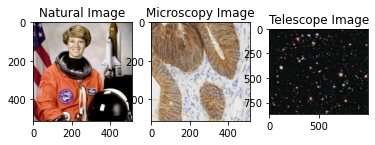

In [2]:
# import packages
import matplotlib.pyplot as plt
from skimage import data

#import images
astronaut = data.astronaut()
ihc = data.immunohistochemistry()
hubble = data.hubble_deep_field()

# Initialize the subplot panels to be side by side
fig, ax = plt.subplots(nrows=1, ncols=3)

# Show each image
ax[0].imshow(astronaut)
ax[0].set_title('Natural Image')
ax[1].imshow(ihc)
ax[1].set_title('Microscopy Image')
ax[2].imshow(hubble)
ax[2].set_title('Telescope Image')


These are examples of 2D images with only x and y.  3D images will have an extra depth dimension (z plane)

###Getting the Data

Dataset:  Buchel and Friston, *Evaluated with Structural Equation Modeling and fMRI (1997)*

In [3]:
# Create temporary directory

import tempfile
d = tempfile.mkdtemp()

In [4]:
# Download the Data

import os
os.path.basename('http://google.com/attention.zip')

from urllib.request import urlretrieve
url = 'http://www.fil.ion.ucl.ac.uk/spm/download/data/attention/attention.zip'

# Retrieve 
fn, info = urlretrieve(url, os.path.join(d, 'attention.zip'))

In [5]:
#Extract the contents into the temporary directory created

import zipfile
zipfile.ZipFile(fn).extractall(path=d)

In [6]:
# List the first 10 files

[f.filename for f in zipfile.ZipFile(fn).filelist[:10]]

['attention/',
 'attention/multi_block_regressors.mat',
 'attention/README_DATA.txt',
 'attention/factors.mat',
 'attention/functional/',
 'attention/functional/snffM00587_0201.hdr',
 'attention/functional/snffM00587_0040.img',
 'attention/functional/snffM00587_0458.hdr',
 'attention/functional/snffM00587_0185.img',
 'attention/functional/snffM00587_0018.hdr']

###Reading and Viewing the Data

In [7]:
# files are in NIfTI format, will ne to import nibabel as a reader
import nibabel

In [8]:
#Read the image
struct = nibabel.load(os.path.join(d, 'attention/structural/nsM00587_0002.hdr'))

# return a clean Numpy array, without all the metadata
struct_arr = struct.get_fdata()

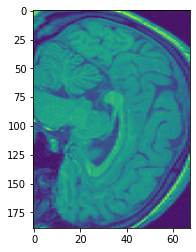

In [9]:
# View a slice in the array

plt.imshow(struct_arr[75], aspect=0.5)

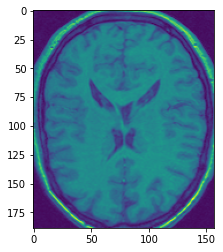

In [10]:
# Transpose data to only look at horizontal slices, which do not require additional aspect argument

struct_arr2 = struct_arr.T
plt.imshow(struct_arr2[34])

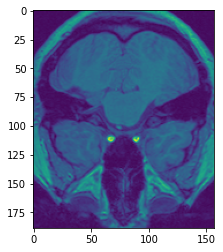

In [11]:
plt.imshow(struct_arr2[5])

Matplotlib has an event handler API that allows for defining actions to perform on a plot, including changing the plot's data in response to particular key presses or mouse button clicks.  Using this function will enable the ability to explore 3D data through scrolling

In [12]:
# Add 3D scrolling capabilites to the Matplotlib viewer to explore 3D data
# Bind J and K keys on the keyboard to 'previous slice' and 'next slice' respectively

def previous_slice():
  pass

def next_slice():
  pass

def process_key(event):
  if event.key == 'j':
    previous_slice()
  elif event.key == 'k':
    next_slice()    
    

5

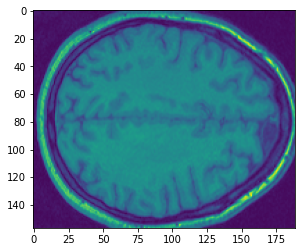

In [13]:
# Tell the Matplotlib figure to use the process_key function to process keyboard strikes by using the canvas method mpl_connect

fig, ax = plt.subplots()
ax.imshow(struct_arr[..., 43])
fig.canvas.mpl_connect('key_press_event', process_key)


In [14]:
# Plot an arbitrary index, store that index as an additional runtime attribute on the Axes object
# Provide functions 'next_slice' and 'previous_slice' that change the index and use 'set_array' to set the corresponding slice of the 3D volume
# Use the figure canvas 'draw' method to redraw the figure with new data

def remove_keymap_conflicts(new_keys_set):
  for prop in plt.rcParams:
    if prop.startswith('keymap.'):
      keys = plt.rcParams[prop]
      remove_list = set(keys) & new_keys_set
      for key in remove_list:
        keys.remove(key)

def multi_slice_viewer(volume):
  remove_keymap_conflicts({'j', 'k'})
  fig, ax = plt.subplots()
  ax.volume = volume
  ax.index = volume.shape[0] // 2
  ax.imshow(volume[ax.index])
  fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
  fig = event.canvas.figure
  ax = fig.axes[0]
  if event.key == 'j':
    previous_slice(ax)
  elif event.key == 'k':
    next_slice(ax)
  fig.canvas.draw()

def previous_slice(ax):
  """Go to previous slice."""
  volume = ax.volume
  ax.index = (ax.index - 1) % volume.shape[0]   #wrap around using %
  ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
  """Go to next slice."""
  volume = ax.volume
  ax.index = (ax.index + 1) % volume.shape[0]
  ax.images[0].set_array(volume[ax.index])          


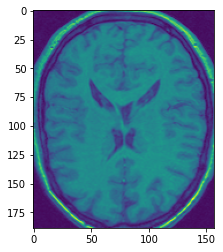

In [15]:
# Call function

multi_slice_viewer(struct_arr2)

In [16]:
import shutil

shutil.rmtree(d)

Source:

https://www.datacamp.com/community/tutorials/matplotlib-3d-volumetric-data

Thank you to Juan Nunez-Iglesias for being kind enough to create and share this tutorial